In [89]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
#### 머신러닝을 활용한 데이터 분석
# 정확도 정밀도 재현율
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV
# 분류모델 테스트
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.metrics import roc_curve,roc_auc_score
# 데이터셋 분류: 트레인테스트셋분류,k-fold,s-kfold, gridsearchcv
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#ROC AUC 오차행렬
from sklearn.tree import export_graphviz
import graphviz
# 경고 무시 LogisticRegression solver 및 maxiter 문제 
import warnings
warnings.filterwarnings('ignore')

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [92]:
def modelacc(title,model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    acc=np.round(accuracy_score(pred,y_test),4)
    f1=np.round(f1_score(pred,y_test),4)
    pre=np.round(precision_score(pred,y_test),4)
    rec=np.round(recall_score(pred,y_test),4)
    pp=model.predict_proba(X_test)[:,1]
    auc=np.round(roc_auc_score(y_test,pp),4)
    res={'model':title,'accuracy':acc,'precision':pre,'recall':rec,'f1':f1,'roc_auc':auc}
    print('정확도:',res)
    return res

In [ ]:
### 신용카드 사기 검출
* 캐글 신용카드 사기 검출

In [95]:
file='src/creditcard.csv'
carddf=pd.read_csv(file)
carddf.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [100]:
carddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* 데이터 컬럼정보
    - Time : 시간 
    - V1~V28: 고객정보로 보여짐 
    - Amount:  거래금액
    - Class: 사기거래

Class
0        284315
1           492
dtype: int64

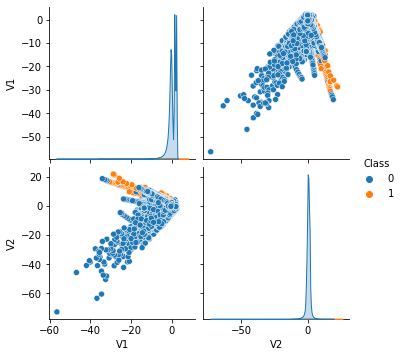

In [105]:
# 사기 검출 가능성 높음
sns.pairplot(carddf[['V1','V2','Class']],hue='Class')

In [109]:
# 비대칭도가 높음
carddf[['Class']].value_counts()/len(carddf[['Class']])

Class
0        0.998273
1        0.001727
dtype: float64

In [125]:
X=carddf.iloc[:,1:-1]
Y=carddf['Class']

In [126]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [127]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,random_state=123,stratify=Y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(213605, 29) (71202, 29) (213605,) (71202,)


In [129]:
y_train.value_counts()/len(y_train)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [131]:
y_test.value_counts()/len(y_test)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [139]:
carddf['Class']
#model=DecisionTreeClassifier(random_state=123)
#res=modelacc('DT',model,X_train,y_train,X_test,y_test)
#modelres.append(res)

#model=KNeighborsClassifier( n_neighbors=3)
#res=modelacc('KNN',model,X_train,y_train,X_test,y_test)
#modelres.append(res)

model=LogisticRegression(random_state=123)
res=modelacc('LR',model,X_train,y_train,X_test,y_test)
modelres.append(res)

model=RandomForestClassifier(random_state=123)
res=modelacc('RF',model,X_train,y_train,X_test,y_test)
modelres.append(res)

#model=GradientBoostingClassifier(random_state=123)
#res=modelacc('GB',model,X_train,y_train,X_test,y_test)
#modelres.append(res)

#XGB
#model=XGBClassifier( random_state=123)
#res=modelacc('XGB',model,X_train,y_train,X_test,y_test)
#modelres.append(res)

#LGBM
model =LGBMClassifier(n_estimators=100,
                      learning_rate=0.1,
                      max_depth=20,
                      min_child_samples=20,
                      num_leaves=31,
                      boost_from_average=False
                     )
res=modelacc('LGB',model,X_train,y_train,X_test,y_test)
modelres.append(res)

정확도: {'model': 'LR', 'accuracy': 0.9992, 'precision': 0.6341, 'recall': 0.8478, 'f1': 0.7256, 'roc_auc': 0.944}
정확도: {'model': 'RF', 'accuracy': 0.9993, 'precision': 0.6911, 'recall': 0.9043, 'f1': 0.7834, 'roc_auc': 0.9291}
정확도: {'model': 'LGB', 'accuracy': 0.9991, 'precision': 0.7398, 'recall': 0.7398, 'f1': 0.7398, 'roc_auc': 0.9764}


<AxesSubplot:xlabel='model'>

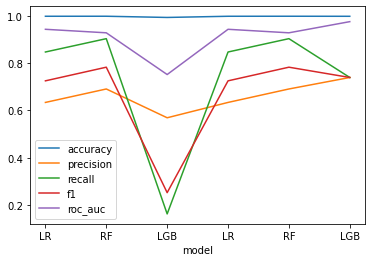

In [141]:
modeldf=pd.DataFrame(modelres)
modeldf.index=modeldf['model']
modeldf.plot()


<AxesSubplot:xlabel='Amount', ylabel='Density'>

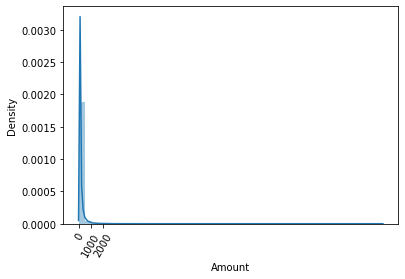

In [140]:
# Amount 비대칭문제
plt.xticks(range(0,3000,1000),rotation=60)
sns.distplot(carddf['Amount'])

In [183]:
ccdf=carddf.copy()
sts=StandardScaler()
samount=sts.fit_transform(ccdf['Amount'].values.reshape(-1,1))
samount
ccdf['Amount']=samount
#ccdf.drop(['Amount'],axis=1)
ccdf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


<AxesSubplot:xlabel='Amount', ylabel='Density'>

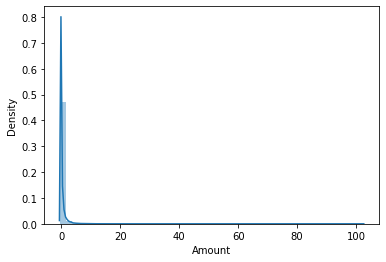

In [184]:
sns.distplot(ccdf['Amount'])

In [185]:
X=ccdf.iloc[:,1:-1]
Y=ccdf['Class']

In [186]:
def modelTestAcc(X,Y):
    X_train,X_test,y_train,y_test= train_test_split(X,Y,random_state=123,stratify=Y)
    modelres=[]
    model=LogisticRegression(random_state=123)
    res=modelacc('LR',model,X_train,y_train,X_test,y_test)
    modelres.append(res)

    model=RandomForestClassifier(random_state=123)
    res=modelacc('RF',model,X_train,y_train,X_test,y_test)
    modelres.append(res)

    #LGBM
    model =LGBMClassifier(n_estimators=100,
                          learning_rate=0.1,
                          max_depth=20,
                          min_child_samples=20,
                          num_leaves=31,
                          boost_from_average=False
                         )
    res=modelacc('LGB',model,X_train,y_train,X_test,y_test)
    modelres.append(res)
    modeldf=pd.DataFrame(modelres)
    modeldf.index=modeldf['model']
    modeldf.plot()
    return modeldf

정확도: {'model': 'LR', 'accuracy': 0.9991, 'precision': 0.5854, 'recall': 0.8675, 'f1': 0.699, 'roc_auc': 0.9664}
정확도: {'model': 'RF', 'accuracy': 0.9993, 'precision': 0.6911, 'recall': 0.9043, 'f1': 0.7834, 'roc_auc': 0.9291}
정확도: {'model': 'LGB', 'accuracy': 0.9995, 'precision': 0.7317, 'recall': 0.9375, 'f1': 0.8219, 'roc_auc': 0.9595}


,model,accuracy,precision,recall,f1,roc_auc
model,,,,,,
LR,LR,0.9991,0.5854,0.8675,0.6990,0.9664
RF,RF,0.9993,0.6911,0.9043,0.7834,0.9291
LGB,LGB,0.9995,0.7317,0.9375,0.8219,0.9595


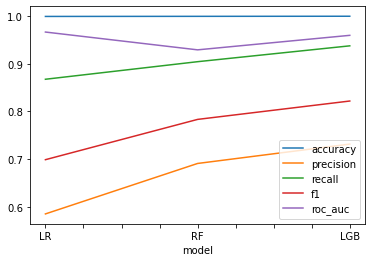

In [187]:
modelTestAcc(X,Y)

<AxesSubplot:>

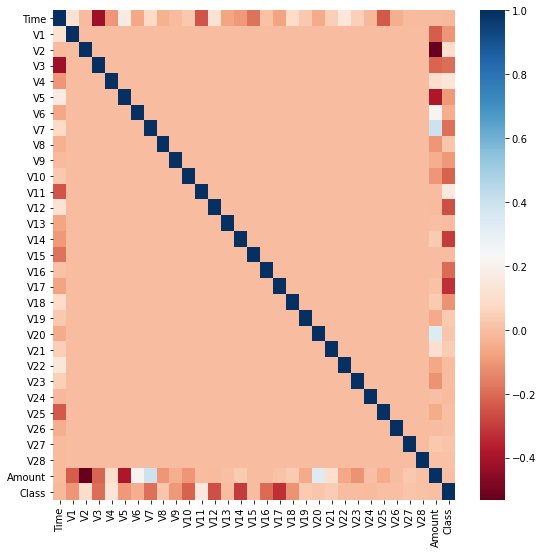

In [188]:
corrdf=ccdf.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corrdf,cmap='RdBu')

<AxesSubplot:xlabel='V17', ylabel='Density'>

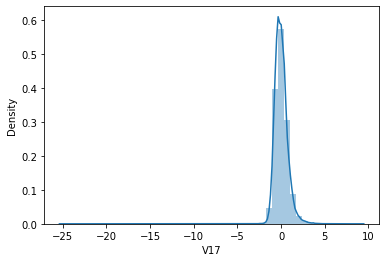

In [197]:
sns.distplot(ccdf['V17'])

<AxesSubplot:xlabel='V14', ylabel='Density'>

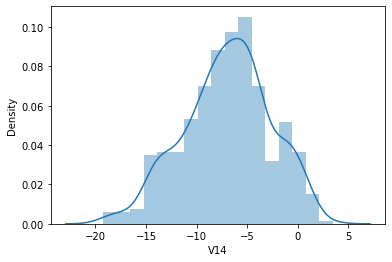

In [220]:
sns.distplot(ccdf[ccdf['Class']==1]['V14'])

In [214]:
def getOut(df,col,w=1.5):
    fd=df[df['Class']==1][col]
    q25=np.percentile(fd.values,25)
    q75=np.percentile(fd.values,74)
    iqr=q75-q25
    iqrw=w*iqr
    low_cut=q25-iqrw
    high_cut=q75+iqrw
    outindex=fd[(fd<low_cut)|(fd>high_cut)].index
    print('outlier:',len(outindex),'low_cut:',low_cut,'high_cut:',high_cut)
    return outindex

In [227]:
len(ccdf[ccdf['Class']==1])

492

In [228]:
len(ocdf[ocdf['Class']==1])

487

outlier: 5 low_cut: -17.708239997801343 high_cut: 3.666472089742541


<AxesSubplot:xlabel='V14', ylabel='Density'>

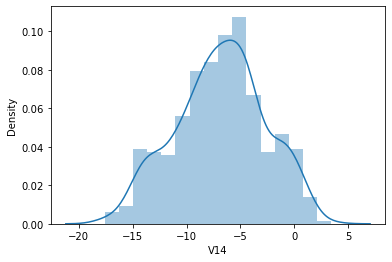

In [229]:
### 아웃라이어 제거후 평가
ocdf=ccdf.copy()
v14out=getOut(ocdf,'V14',w=1.5)
ocdf.drop(v14out,axis=0,inplace=True)
sns.distplot(ocdf[ocdf['Class']==1]['V14'])

정확도: {'model': 'LR', 'accuracy': 0.9992, 'precision': 0.6557, 'recall': 0.8696, 'f1': 0.7477, 'roc_auc': 0.9768}
정확도: {'model': 'RF', 'accuracy': 0.9995, 'precision': 0.7459, 'recall': 0.9192, 'f1': 0.8235, 'roc_auc': 0.945}
정확도: {'model': 'LGB', 'accuracy': 0.9996, 'precision': 0.7787, 'recall': 0.9596, 'f1': 0.8597, 'roc_auc': 0.9846}


,model,accuracy,precision,recall,f1,roc_auc
model,,,,,,
LR,LR,0.9992,0.6557,0.8696,0.7477,0.9768
RF,RF,0.9995,0.7459,0.9192,0.8235,0.9450
LGB,LGB,0.9996,0.7787,0.9596,0.8597,0.9846


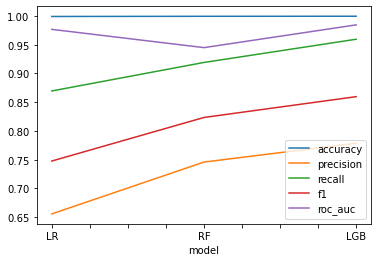

In [230]:

X=ocdf.iloc[:,1:-1]
Y=ocdf['Class']
modelTestAcc(X,Y)

### SMOTE
* 비대칭 데이터의 오버샘플링 기법

In [232]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=123)
sX,sY=smote.fit_resample(X,Y)
sY.value_counts()/len(sX)

0    0.5
1    0.5
Name: Class, dtype: float64

In [233]:
sY.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

정확도: {'model': 'LR', 'accuracy': 0.9454, 'precision': 0.9158, 'recall': 0.9735, 'f1': 0.9438, 'roc_auc': 0.9889}
정확도: {'model': 'RF', 'accuracy': 0.9999, 'precision': 1.0, 'recall': 0.9997, 'f1': 0.9999, 'roc_auc': 1.0}
정확도: {'model': 'LGB', 'accuracy': 0.9991, 'precision': 1.0, 'recall': 0.9981, 'f1': 0.9991, 'roc_auc': 0.9999}


,model,accuracy,precision,recall,f1,roc_auc
model,,,,,,
LR,LR,0.9454,0.9158,0.9735,0.9438,0.9889
RF,RF,0.9999,1.0000,0.9997,0.9999,1.0000
LGB,LGB,0.9991,1.0000,0.9981,0.9991,0.9999


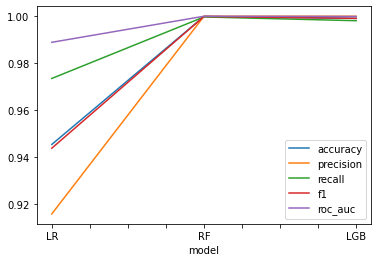

In [234]:
modelTestAcc(sX,sY)
